In [1]:
import dte_adj
from dte_adj.plot import plot
import numpy as np
import matplotlib.pyplot as plt

## Data setup

In [4]:
def generate_data(n, d_x=100, rho=0.5):
    """
    Generate data according to the described data generating process (DGP).

    Args:
    n (int): Number of samples.
    d_x (int): Number of covariates. Default is 100.
    rho (float): Success probability for the Bernoulli distribution. Default is 0.5.

    Returns:
    X (np.ndarray): Covariates matrix of shape (n, d_x).
    D (np.ndarray): Treatment variable array of shape (n,).
    Y (np.ndarray): Outcome variable array of shape (n,).
    """
    # Generate covariates X from a uniform distribution on (0, 1)
    X = np.random.uniform(0, 1, (n, d_x))
    
    # Generate treatment variable D from a Bernoulli distribution with success probability rho
    D = np.random.binomial(1, rho, n)
    
    # Define beta_j and gamma_j according to the problem statement
    beta = np.zeros(d_x)
    gamma = np.zeros(d_x)
    
    # Set the first 50 values of beta and gamma to 1
    beta[:50] = 1
    gamma[:50] = 1
    
    # Compute the outcome Y
    U = np.random.normal(0, 1, n)  # Error term
    linear_term = np.dot(X, beta)
    quadratic_term = np.dot(X**2, gamma)
    
    # Outcome equation
    Y = 5 * D + linear_term + quadratic_term + U
    
    return X, D, Y


n = 1000  # Sample size
X, D, Y = generate_data(n)

# Display the first few rows of the generated data
print("X (covariates):\n", X[:5])
print("D (treatment):\n", D[:5])
print("Y (outcome):\n", Y[:5])

X (covariates):
 [[0.12641303 0.05696456 0.58479614 0.68858323 0.23511541 0.31124477
  0.04393604 0.30042948 0.6504025  0.59975467 0.41115078 0.68211891
  0.54306886 0.61412346 0.08234649 0.45512862 0.13813775 0.60807376
  0.82933823 0.11962177 0.53688289 0.04729065 0.67870638 0.72091595
  0.95201376 0.61824264 0.69538654 0.77468073 0.57879628 0.42173621
  0.41069696 0.94800742 0.25129626 0.85641496 0.43967321 0.83966249
  0.82187026 0.88692407 0.15939296 0.15219853 0.26866252 0.92981832
  0.79865998 0.89798014 0.24126357 0.85244902 0.86886548 0.44403683
  0.04263548 0.75940323 0.36134374 0.47714832 0.29044914 0.96983854
  0.11837795 0.22502975 0.26506437 0.99404086 0.59673872 0.00508437
  0.3003793  0.74468562 0.87382161 0.80273698 0.86038782 0.26900319
  0.66261938 0.80650841 0.25484264 0.66584103 0.74398632 0.34788024
  0.74325574 0.35408177 0.05222826 0.53777256 0.09415705 0.18673845
  0.18208973 0.88496179 0.74189884 0.24880414 0.12061438 0.33051337
  0.18823147 0.28633802 0.82396

## Simple Estimator

In [5]:
estimator = dte_adj.SimpleDistributionEstimator()

In [6]:
estimator.fit(X, D, Y)

<Axes: title={'center': 'DTE of simple estimator'}>

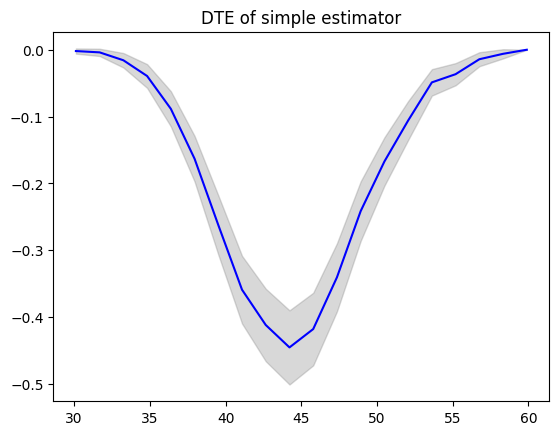

In [7]:
locations = np.linspace(Y.min(), Y.max(), 20)
dte, lower_bound, upper_bound = estimator.predict_dte(target_treatment_arm=1, control_treatment_arm=0, locations=locations, variance_type="simple")
plot(locations, dte, lower_bound, upper_bound, title="DTE of simple estimator")

<Axes: title={'center': 'PTE of simple estimator'}>

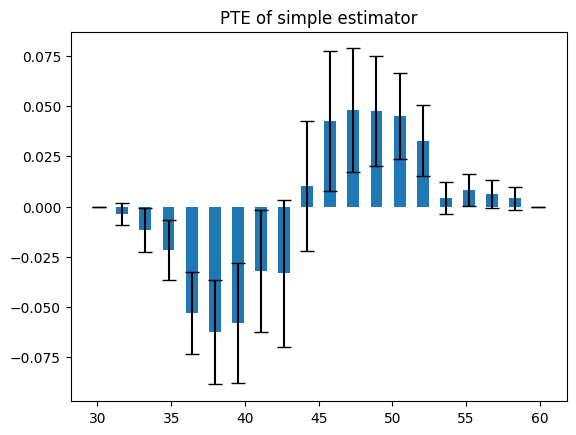

In [8]:
pte, lower_bound, upper_bound = estimator.predict_pte(target_treatment_arm=1, control_treatment_arm=0, width=1, locations=locations)
plot(locations, pte, lower_bound, upper_bound, chart_type="bar", title="PTE of simple estimator")

<Axes: title={'center': 'QTE of simple estimator'}>

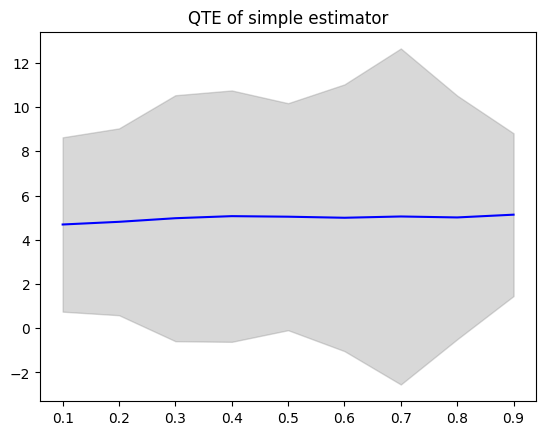

In [9]:
quantiles = np.array([0.1 * i for i in range(1, 10)], dtype=np.float32)
qte, lower_bound, upper_bound = estimator.predict_qte(target_treatment_arm=1, control_treatment_arm=0, quantiles=quantiles, n_bootstrap=30)
plot(quantiles, qte, lower_bound, upper_bound, title="QTE of simple estimator")

## Adjusted Estimator

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
logit = LogisticRegression()

In [12]:
estimator = dte_adj.AdjustedDistributionEstimator(logit)

In [13]:
estimator.fit(X, D, Y)

<Axes: title={'center': 'DTE of adjusted estimator with simple confidence band'}>

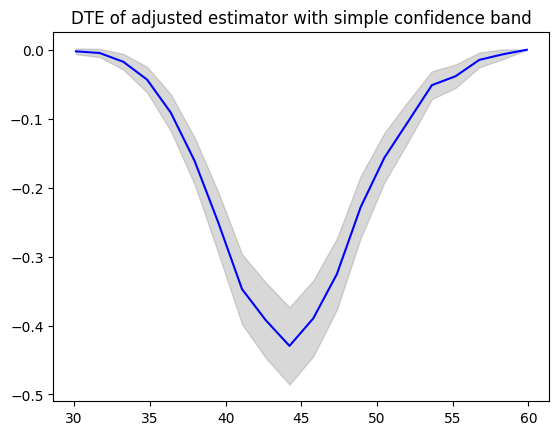

In [14]:
dte, lower_bound, upper_bound = estimator.predict_dte(target_treatment_arm=1, control_treatment_arm=0, locations=locations, variance_type="simple")
plot(locations, dte, lower_bound, upper_bound, title="DTE of adjusted estimator with simple confidence band")

<Axes: title={'center': 'DTE of adjusted estimator with moment confidence band'}>

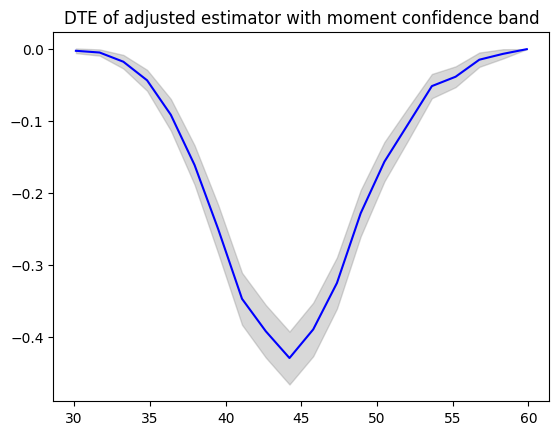

In [15]:
dte, lower_bound, upper_bound = estimator.predict_dte(target_treatment_arm=1, control_treatment_arm=0, locations=locations, variance_type="moment")
plot(locations, dte, lower_bound, upper_bound, title="DTE of adjusted estimator with moment confidence band")

<Axes: title={'center': 'DTE of adjusted estimator with uniform confidence band'}>

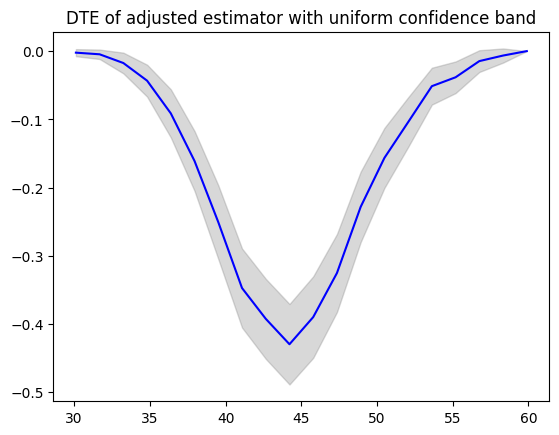

In [16]:
dte, lower_bound, upper_bound = estimator.predict_dte(target_treatment_arm=1, control_treatment_arm=0, locations=locations, variance_type="uniform")
plot(locations, dte, lower_bound, upper_bound, title="DTE of adjusted estimator with uniform confidence band")

<Axes: title={'center': 'PTE of adjusted estimator with simple confidence band'}>

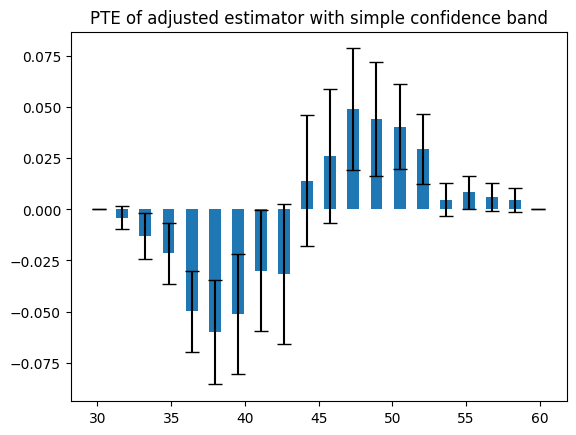

In [17]:
pte, lower_bound, upper_bound = estimator.predict_pte(target_treatment_arm=1, control_treatment_arm=0, width=1, locations=locations, variance_type="simple")
plot(locations, pte, lower_bound, upper_bound, chart_type="bar", title="PTE of adjusted estimator with simple confidence band")

<Axes: title={'center': 'PTE of adjusted estimator with moment confidence band'}>

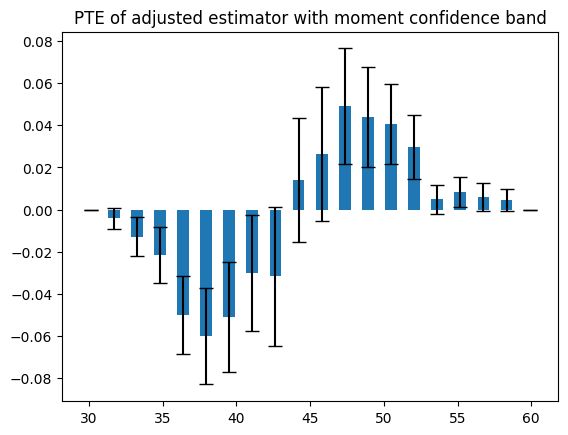

In [18]:
pte, lower_bound, upper_bound = estimator.predict_pte(target_treatment_arm=1, control_treatment_arm=0, width=1, locations=locations, variance_type="moment")
plot(locations, pte, lower_bound, upper_bound, chart_type="bar", title="PTE of adjusted estimator with moment confidence band")

<Axes: title={'center': 'QTE of adjusted estimator'}>

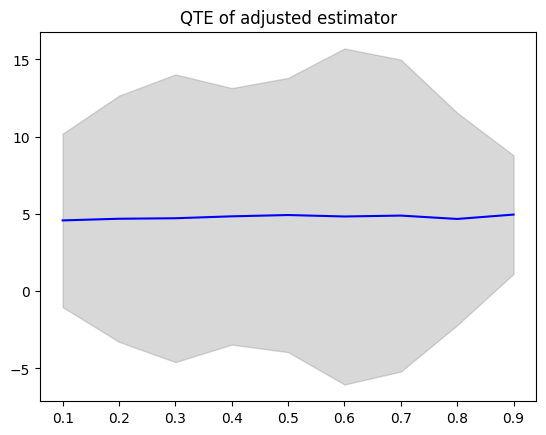

In [20]:
quantiles = np.array([0.1 * i for i in range(1, 10)], dtype=np.float32)
qte, lower_bound, upper_bound = estimator.predict_qte(target_treatment_arm=1, control_treatment_arm=0, quantiles=quantiles, n_bootstrap=30)
plot(quantiles, qte, lower_bound, upper_bound, title="QTE of adjusted estimator")